In [1]:
import os
import sys
from pathlib import Path

import matplotlib.pyplot as plt
from GreenSlothUtils.demonstration import (
    create_day_simulation_fig,
    create_fvcb_fig,
    create_mca_fig,
    create_pam_fig,
    create_pamfit,
)
from mxlpy import InitialAssignment

sys.path.append(os.path.abspath('..'))

from model import Bellasio2019


def save_fig(fig_name: str, add_name: bool = False) -> Path:
    here = Path("").absolute()
    name = "Bellasio2019"
    plt.savefig(here / f"{name.lower()}_demon_{fig_name}.svg", format="svg", bbox_inches="tight")
    if add_name:
        plt.text(0.5, 1, transform=plt.gcf().transFigure, s=name, fontsize=16, fontweight="bold", ha="center")
        plt.savefig(here / f"{name.lower()}_present_{fig_name}.svg", format="svg", bbox_inches="tight")

# Str Dictionary

In [2]:
pfd_str = "PPFD"
vc_str = "v_RuBisCO_c"
atp_str = "ATP_st"
nadph_str = "NADPH_st"
flourescence_str = None
co2_str = "CO2"
pco2_str = "Ca"
H_cp_co2_str = None
gammastar_str = None
r_light_str = "RLight"
A_str = "A"
tend_quasi=1800
npq_str = None
coeff_psii_str = pfd_str
coeff_psi_str = None
coeff_rubisco_str = "kcat_v_RuBisCO_c"
coeff_cytb6f_str = None
coeff_atp_synthase_str = None
rubp_str = "RUBP"
pq_str = None
pc_str = None
v_psii_str = None
v_psi_str = None
v_cytb6f_str = None
v_atp_synthase_str = "v_ATPsynth"

# Day Simulation

Trying simulation with 100 time points per step.


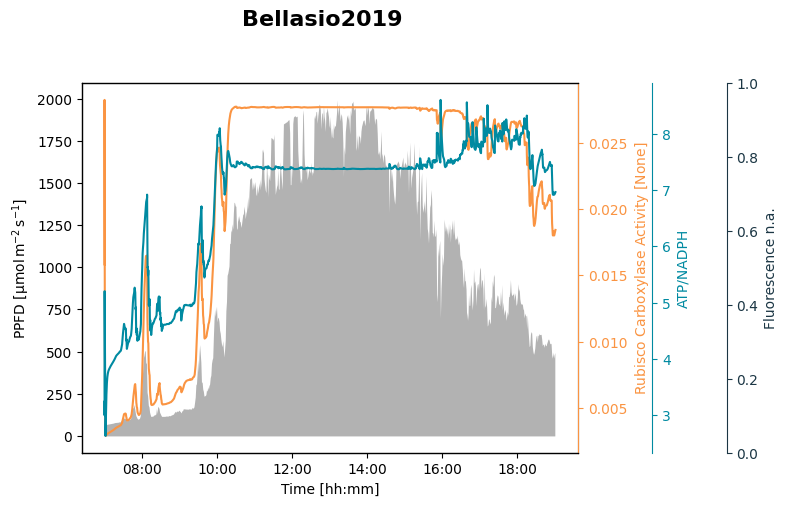

In [3]:
create_day_simulation_fig(
    model=Bellasio2019(),
    pfd=pfd_str,
    vc=vc_str,
    atp=atp_str,
    nadph=nadph_str,
    flourescence=flourescence_str,
)

save_fig("daysimulation", add_name=True)

# FvCB Comparision

[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1757353025193/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 3435.95177907451 and h = 1.07295900113943e-08, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1757353025193/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 667.805092818306 and h = 10.7731005856353, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1757353025193/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 50006.2543993756 and h = 882.259408754018, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1757353025193/work/sundials/src/cvodes/cvodes.c:8097][cvHandleFailure] At t = 84704743.0668753 and h = 40177.341927316, the error 

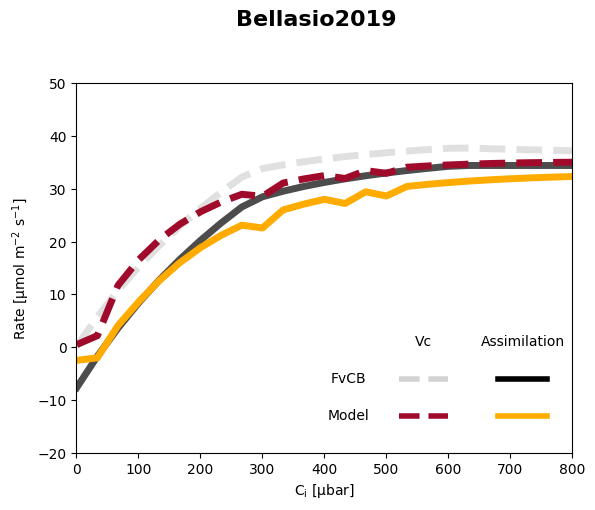

In [4]:
m = Bellasio2019()

def product_thou(x: float) -> float:
    return x * 1000

def calc_Ca_from_Ci(ci: float) -> float:
    return ci / 0.65

m.add_derived(
    "A_µmol_m2_s1",
    fn=product_thou,
    args=[A_str]
)

m.add_derived(
    "vc_µmol_m2_s1",
    fn=product_thou,
    args=[vc_str]
)

m.add_parameter(
    "New_Ci",
    value=1,
)

m.update_parameter(
    name="Ca",
    value=InitialAssignment(fn=calc_Ca_from_Ci, args=["New_Ci"])
)

create_fvcb_fig(
    model=m,
    pfd=pfd_str,
    co2=co2_str,
    vc="vc_µmol_m2_s1",
    pco2="New_Ci",
    H_cp_co2=H_cp_co2_str,
    gammastar=gammastar_str,
    r_light=r_light_str,
    A="A_µmol_m2_s1",
    tend_quasi=tend_quasi
)

save_fig("fvcb", add_name=True)

# PAM Sample

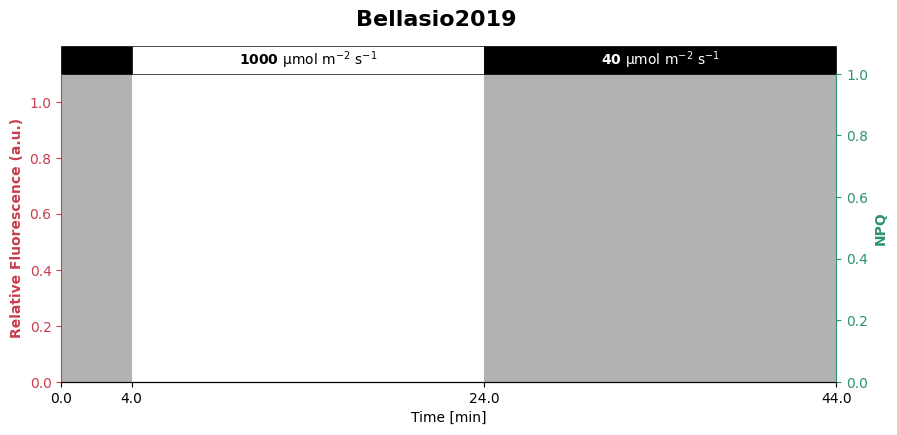

In [5]:
create_pam_fig(
    model=Bellasio2019(),
    pfd_str=pfd_str,
    flourescence_str=flourescence_str,
    npq_str=npq_str,
)

save_fig("pam", add_name=True)

# Photosynthesis MCA

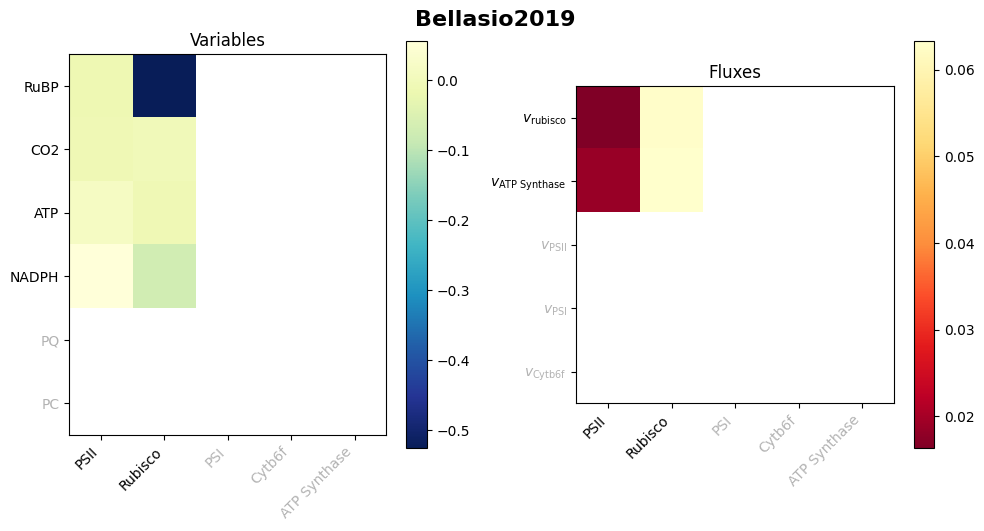

In [6]:
create_mca_fig(
    model=Bellasio2019(),
    coeff_psii=coeff_psii_str,
    coeff_psi=coeff_psi_str,
    coeff_rubisco=coeff_rubisco_str,
    coeff_cytb6f=coeff_cytb6f_str,
    coeff_atp_synthase=coeff_atp_synthase_str,
    rubp=rubp_str,
    co2=co2_str,
    pq=pq_str,
    pc=pc_str,
    atp=atp_str,
    nadph=nadph_str,
    v_rubisco=vc_str,
    v_psii=v_psii_str,
    v_psi=v_psi_str,
    v_cytb6f=v_cytb6f_str,
    v_atp_synthase=v_atp_synthase_str,
)

save_fig("mca", add_name=True)

# PAM Fitting

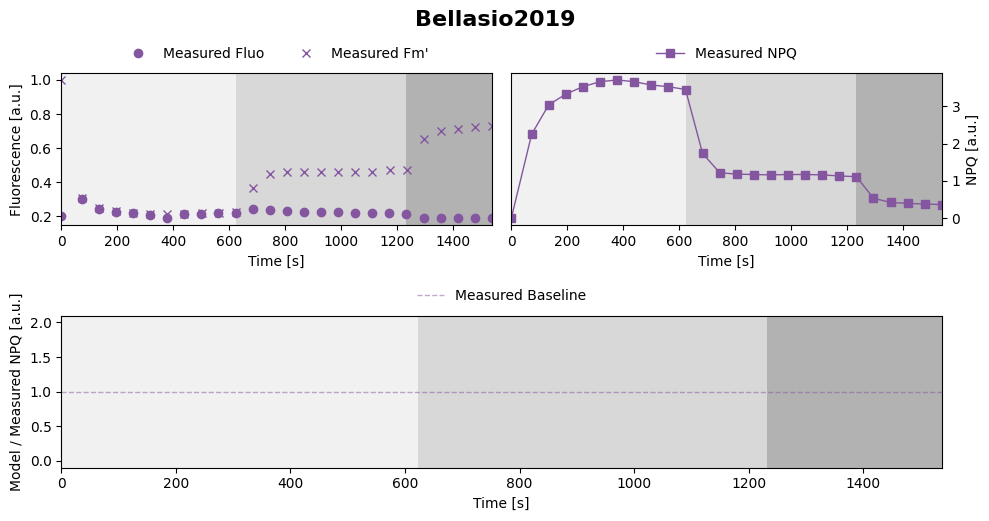

In [7]:
create_pamfit(
    model=Bellasio2019(),
    pfd_str=pfd_str,
    flourescence_str=flourescence_str,
    npq_str=npq_str,
    pam_params_to_fit=None
)

save_fig("fitting", add_name=True)